In [32]:
import pandas as pd

In [43]:
dados = pd.read_csv('dados/tips.csv')

In [34]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Como traduzir colunas

In [44]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [45]:
gorjetas = dados.rename(columns = renomear)

In [46]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Como traduzir valores

In [47]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [48]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias)

In [49]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(hora)

In [50]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


### Graficos com Seaborn

In [53]:
import seaborn as sns

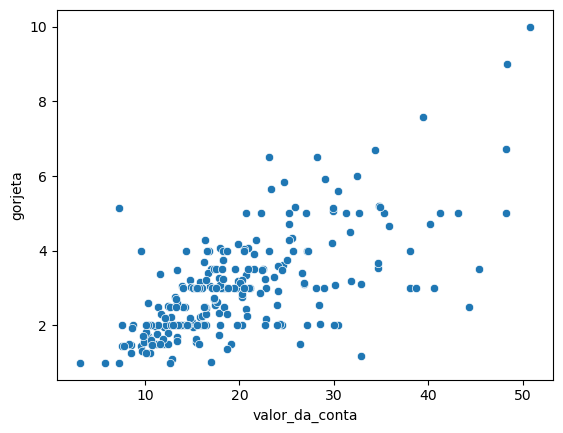

In [56]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

In [83]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [84]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


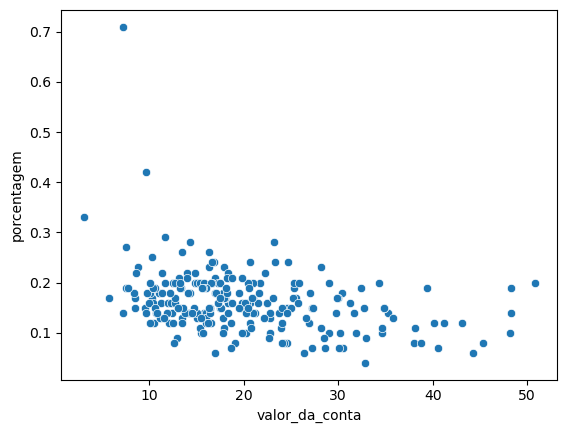

In [85]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

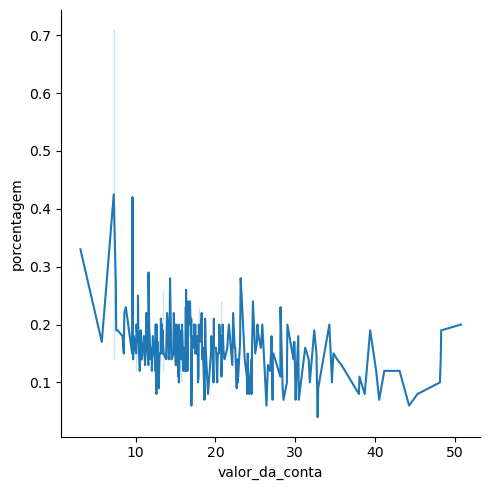

In [86]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

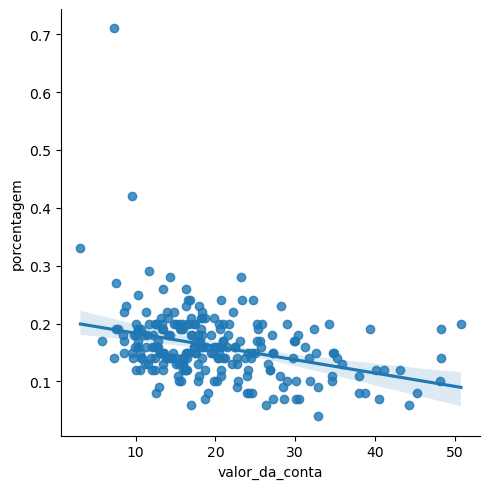

In [88]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

### Analisando sobremesa

In [91]:
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [95]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


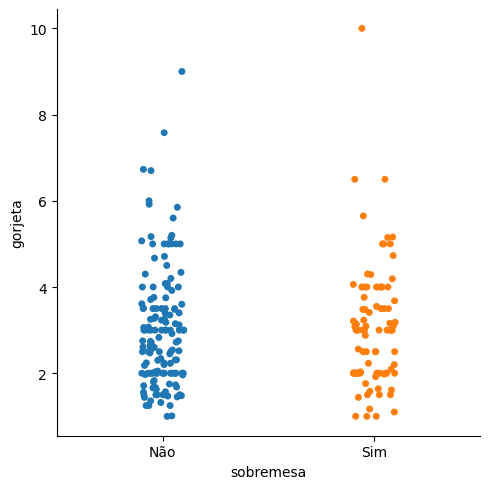

In [96]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

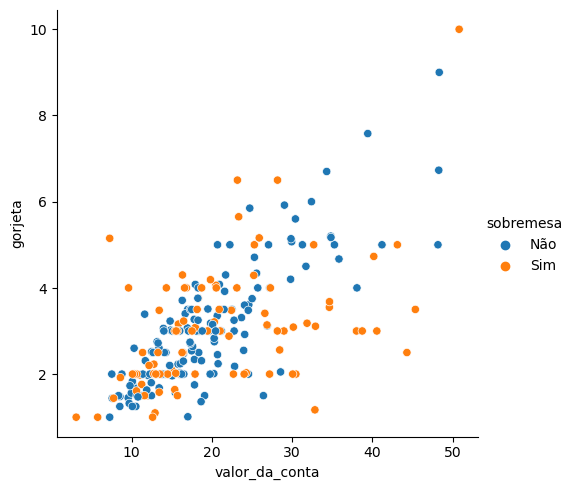

In [98]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

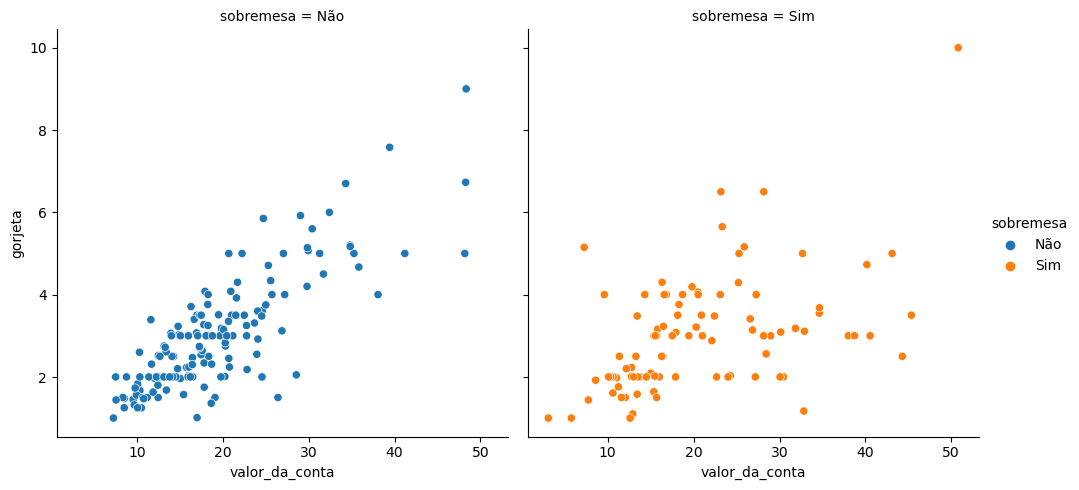

In [99]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

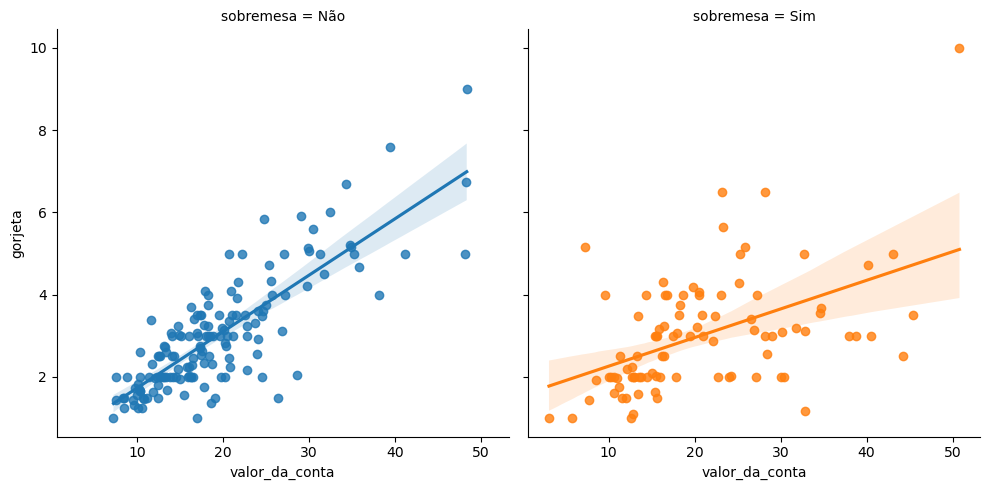

In [101]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

### Teste de hipotese

#### H null = A distribuicão da taxa da gorjeta é a mesma nos dois grupos

#### H alt = A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [102]:
from scipy.stats import ranksums

In [109]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [108]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [110]:
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [111]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [115]:
r = ranksums(sobremesa, sem_sobremesa)

In [117]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


## Analisando dia da semana

In [119]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

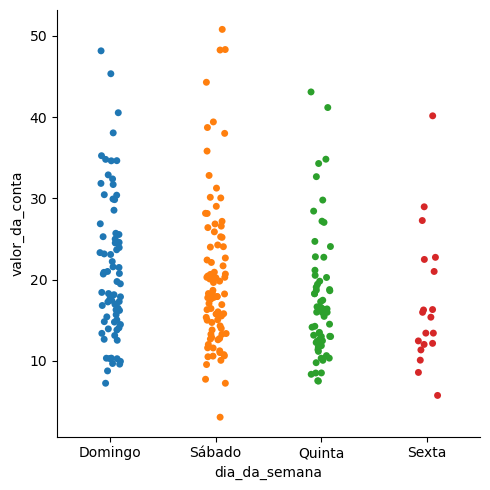

In [120]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

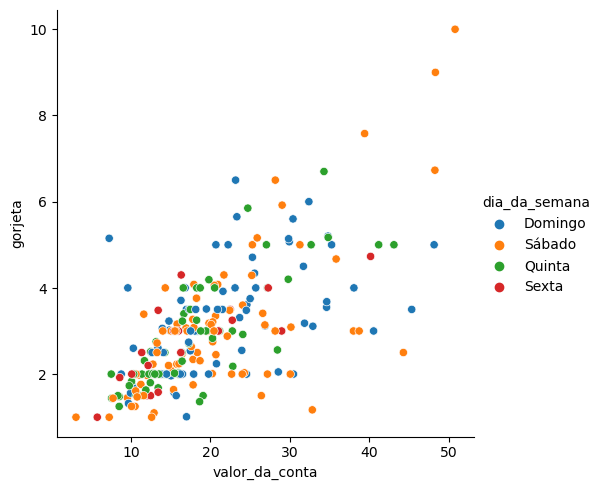

In [121]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

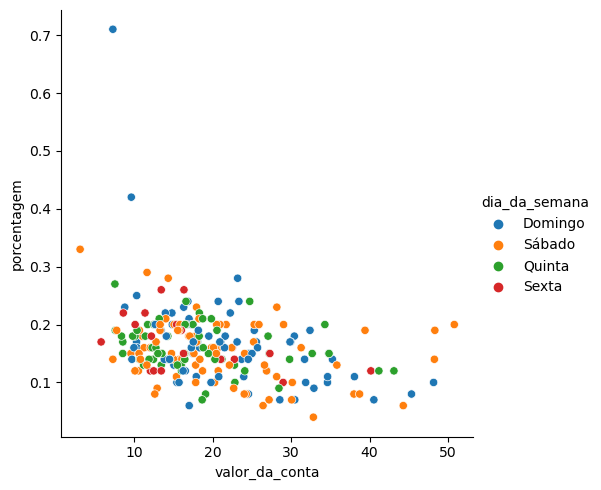

In [122]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

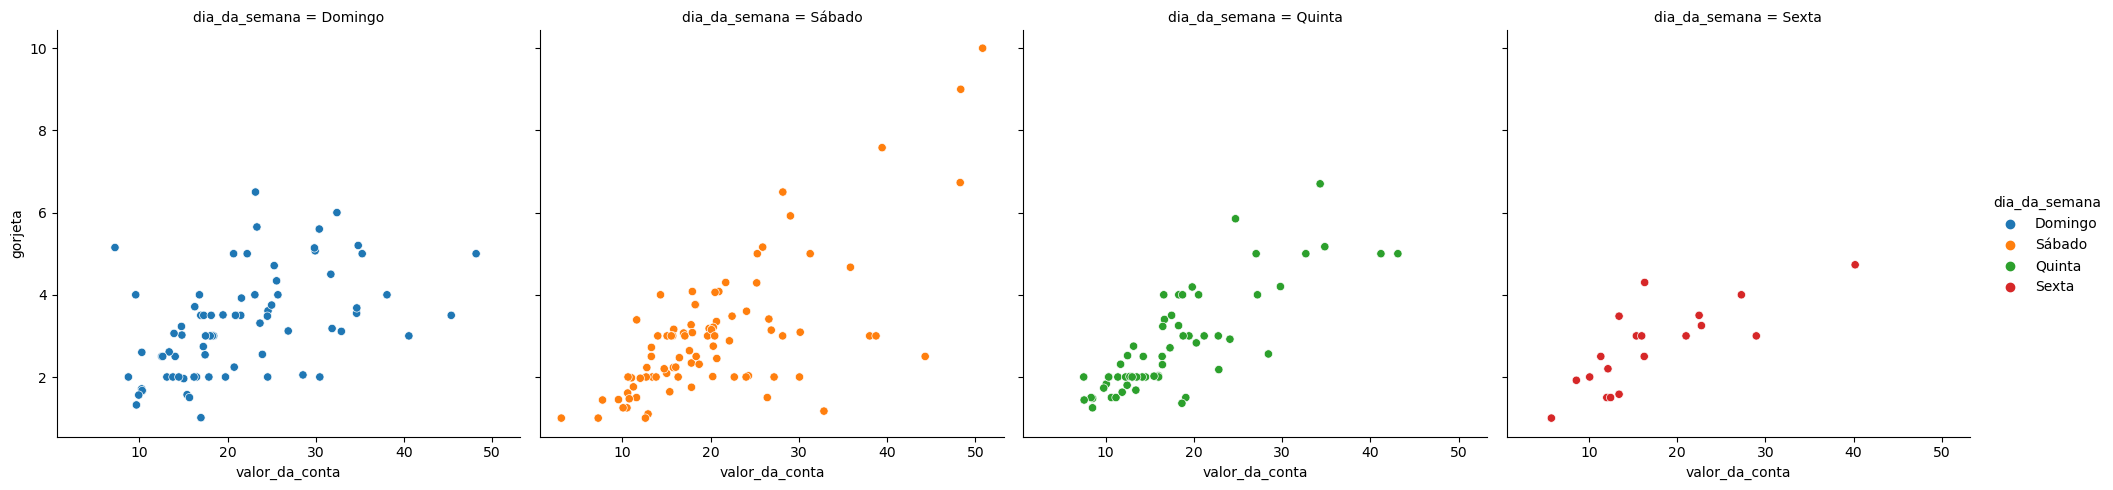

In [123]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

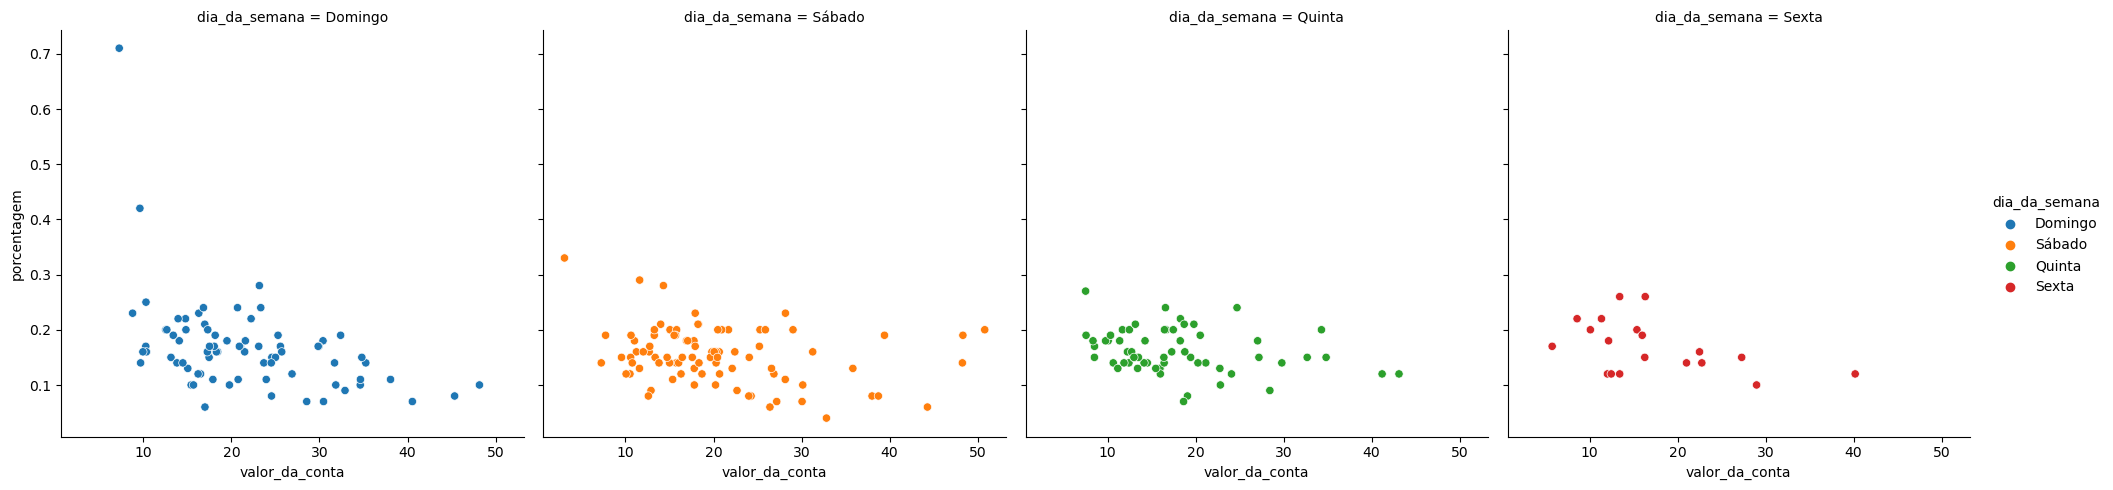

In [124]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [126]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [130]:
gorjetas['dia_da_semana'].value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipotese

#### H null = A distribuicão do valor da conta é igual no sabado e no domingo.

#### H alt = A distribuicão do valor da conta não é igual no sabado e no domingo.

In [133]:
conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [134]:
conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [139]:
r2 = ranksums(conta_domingo, conta_sabado)

In [140]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


## Analisando hora do dia

In [141]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [142]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

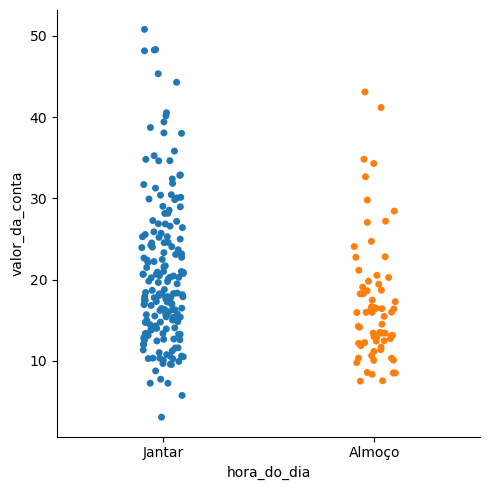

In [143]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

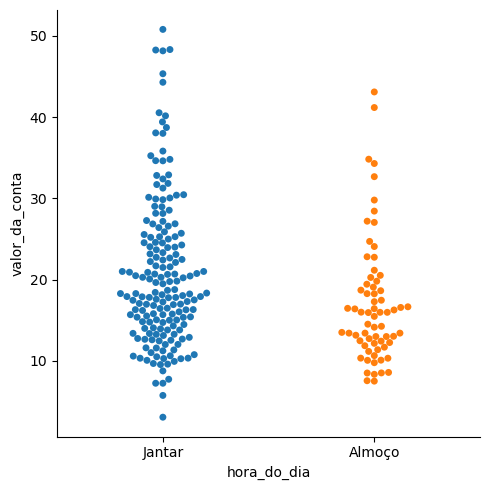

In [144]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm' ,data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

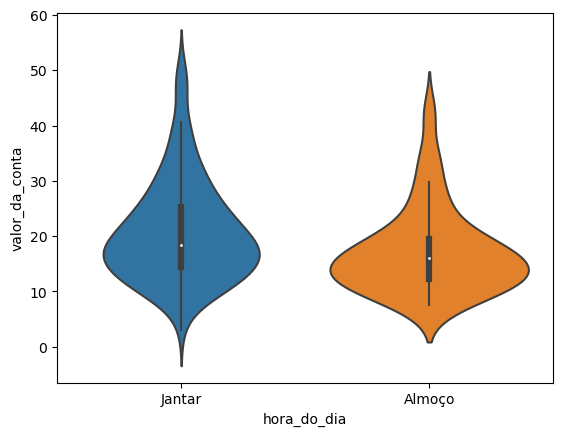

In [145]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

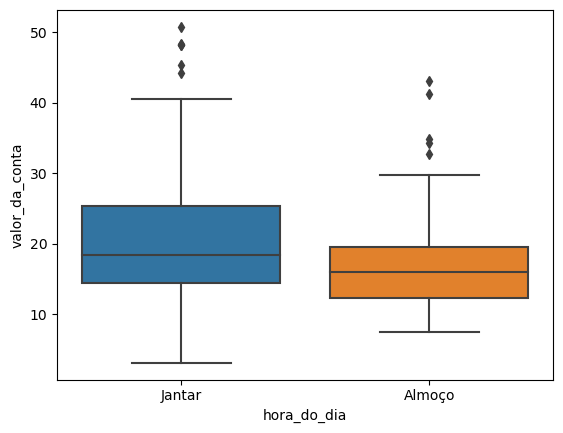

In [146]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [154]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

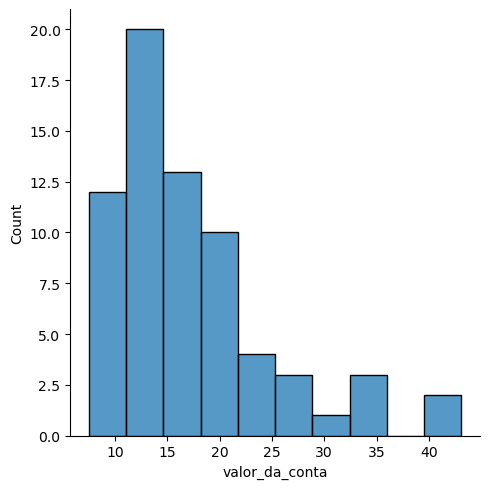

In [157]:
sns.displot(almoco)